In [1]:
%%HTML
<style type="text/css">
table.dataframe td , table.dataframe th {
    border : 1px  black solid ! important ;
  color : black ! important ;
}
</style>

## Importing Library


In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [3]:
df = pd.read_csv ( 'StudentsPerformance.csv' , encoding="UTF-8" )
df . info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df . shape

(1000, 8)

In [5]:
df . columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## number of unique items in dataset

In [6]:
df . nunique ()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
df . head ()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Renaming Data column

In [8]:
df . rename ( columns = { "race/ethnicity" :  "group" , 
                   "parental level of education" : "parental_level_of_education" ,
                  "test preparation course" : "test_preparation_course",
                  "math score" : "math_score" ,
                  "reading score" : "reading_score" ,
                  "writing score" : "writing_score" } , inplace = True )
df . head ()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df . parental_level_of_education . value_counts ()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [10]:
df . isnull () . any ()

gender                         False
group                          False
parental_level_of_education    False
lunch                          False
test_preparation_course        False
math_score                     False
reading_score                  False
writing_score                  False
dtype: bool

In [11]:
df . describe ( include= 'all' ) . transpose ()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading_score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing_score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100


## adding a new column

In [12]:
df [ 'total_score' ] = df ['math_score'] + df ['reading_score'] + df ['writing_score']
df

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [13]:
df . describe ( include = 'all' ) . transpose ()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading_score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing_score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100
total_score,1000,NaN,NaN,NaN,203.312,42.772,27,175,205,233,300


In [14]:
df . groupby ( 'gender' ) . max ()

,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
gender,,,,,,,,
female,group E,some high school,standard,none,100,100,100,300
male,group E,some high school,standard,none,100,100,100,300


In [15]:
df . groupby ( 'parental_level_of_education' ) . max ()

,gender,group,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
parental_level_of_education,,,,,,,,
associate's degree,male,group E,standard,none,100,100,100,300
bachelor's degree,male,group E,standard,none,100,100,100,300
high school,male,group E,standard,none,99,99,100,287
master's degree,male,group E,standard,none,95,100,100,293
some college,male,group E,standard,none,100,100,99,297
some high school,male,group E,standard,none,97,100,100,297


In [16]:
df . groupby ( 'lunch' ) . max()

,gender,group,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score
lunch,,,,,,,,
free/reduced,male,group E,some high school,none,100,100,100,293
standard,male,group E,some high school,none,100,100,100,300


In [17]:
df . groupby ('test_preparation_course') . max()

,gender,group,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score
test_preparation_course,,,,,,,,
completed,male,group E,some high school,standard,100,100,100,300
none,male,group E,some high school,standard,100,100,100,300


## visualizing the average math score of the students for different parental level of education

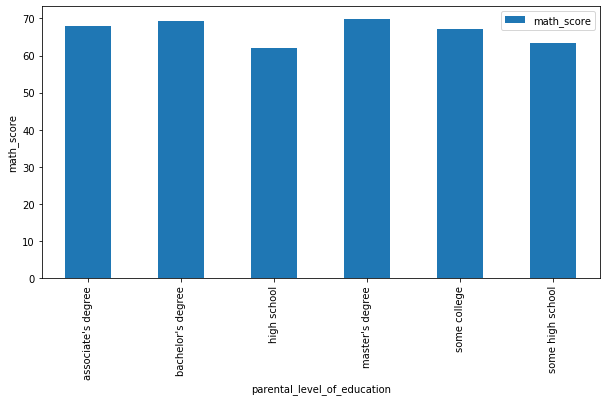

In [18]:
mean_price = df [ [ 'math_score','parental_level_of_education' ] ] . groupby ( 'parental_level_of_education' ) . mean ()
mean_price . plot(kind = 'bar' , figsize = ( 10 , 5 ) )
plt . ylabel ( 'math_score' )
plt . show ( )

## visualizing the average math score of the students for different gender

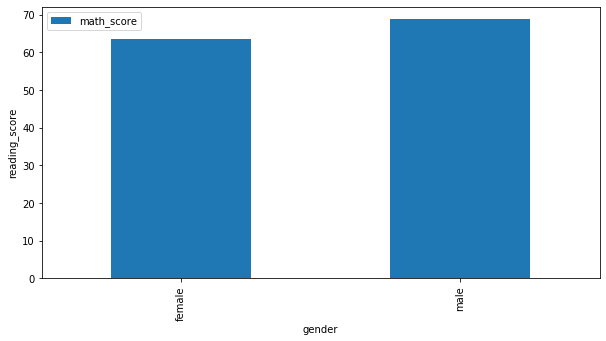

In [19]:
mean_price = df [ [ 'math_score' , 'gender' ] ] . groupby ( 'gender' ) . mean ()
mean_price . plot ( kind = 'bar' , figsize = ( 10 , 5 ) )
plt . ylabel ( 'reading_score' )
plt . show ()

## visualizing the average math score of the students for different lunch

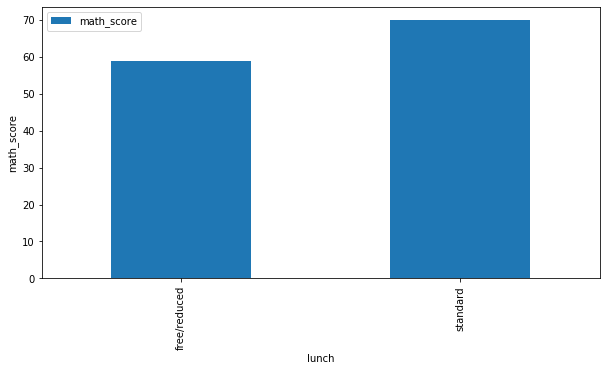

In [20]:
mean_price = df [ [ 'math_score' , 'lunch' ] ] . groupby ( 'lunch' ) . mean ()
mean_price . plot ( kind = 'bar' , figsize = ( 10 , 5 ) )
plt . ylabel ( 'math_score' )
plt . show ()

## Comparing Math score with multiple element

In [21]:
df [ [ 'gender' , 'parental_level_of_education' , 'lunch' , 'math_score' ] ].groupby ( [ 'gender' , 'parental_level_of_education' , 'lunch' ] ) . mean ()

math_score
gender parental_level_of_education lunch                   
female associate's degree          free/reduced   57.972222
                                   standard       68.525000
       bachelor's degree           free/reduced   63.363636
                                   standard       71.024390
       high school                 free/reduced   51.621622
                                   standard       64.368421
       master's degree             free/reduced   57.785714
                                   standard       72.045455
       some college                free/reduced   58.454545
                                   standard       69.540541
       some high school            free/reduced   49.361111
                                   standard       65.800000
male   associate's degree          free/reduced   66.682927
                                   standard       73.338462
       bachelor's degree           free/reduced   62.636364
                                   standard       75.878788
       high school                 free/reduced   57.757576
                                   standard       68.028986
       master's degree             free/reduced   65.900000
                                   standard       81.692308
       some college                free/reduced   62.228571
                                   standard       72.260274
       some high school            free/reduced   60.520000
                                   standard       70.746032

## Comparing Writing score with multiple element

In [22]:
df [ [ 'gender' , 'parental_level_of_education' , 'lunch' ,'writing_score' ] ] . groupby ( [ 'gender' , 'parental_level_of_education' , 'lunch' ] ) . mean ()

writing_score
gender parental_level_of_education lunch                      
female associate's degree          free/reduced      69.500000
                                   standard          76.025000
       bachelor's degree           free/reduced      75.818182
                                   standard          79.756098
       high school                 free/reduced      60.567568
                                   standard          70.666667
       master's degree             free/reduced      72.000000
                                   standard          81.227273
       some college                free/reduced      68.522727
                                   standard          77.337838
       some high school            free/reduced      59.000000
                                   standard          74.363636
male   associate's degree          free/reduced      62.975610
                                   standard          66.938462
       bachelor's degree           free/reduced      62.636364
                                   standard          71.000000
       high school                 free/reduced      53.848485
                                   standard          60.782609
       master's degree             free/reduced      66.900000
                                   standard          77.000000
       some college                free/reduced      57.657143
                                   standard          65.780822
       some high school            free/reduced      55.640000
                                   standard          63.650794

## Comparing Reading score with multiple element

In [23]:
df [ [ 'gender' , 'parental_level_of_education' , 'lunch','reading_score'] ] . groupby ( [ 'gender' , 'parental_level_of_education' , 'lunch' ] ) . mean()

reading_score
gender parental_level_of_education lunch                      
female associate's degree          free/reduced      70.250000
                                   standard          75.862500
       bachelor's degree           free/reduced      74.000000
                                   standard          79.048780
       high school                 free/reduced      63.027027
                                   standard          71.561404
       master's degree             free/reduced      72.214286
                                   standard          79.727273
       some college                free/reduced      69.159091
                                   standard          76.162162
       some high school            free/reduced      60.916667
                                   standard          74.472727
male   associate's degree          free/reduced      65.365854
                                   standard          68.738462
       bachelor's degree           free/reduced      63.863636
                                   standard          70.909091
       high school                 free/reduced      57.060606
                                   standard          63.594203
       master's degree             free/reduced      67.600000
                                   standard          77.384615
       some college                free/reduced      59.942857
                                   standard          67.410959
       some high school            free/reduced      58.960000
                                   standard          66.968254

## scatter plot

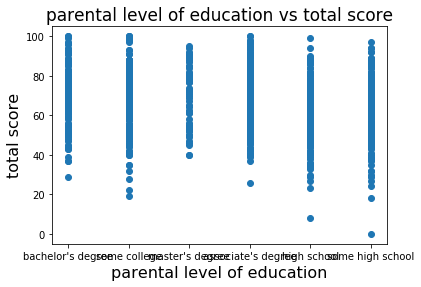

In [24]:
plt . scatter ( df ['parental_level_of_education'] , df ['math_score'] )
plt . title ( 'parental level of education vs total score' , fontsize = 17 )
plt . xlabel ( 'parental level of education' , fontsize = 16 )
plt . ylabel ( 'total score' , fontsize = 16 )
plt . show ()

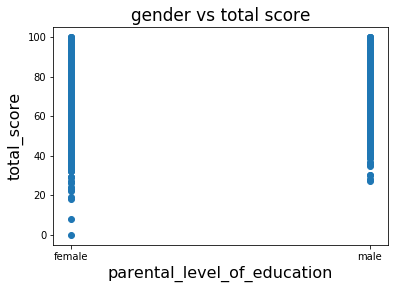

In [25]:
#scatter plot
plt . scatter ( df ['gender'] , df [ 'math_score' ] )
plt . title ( 'gender vs total score' , fontsize = 17 )
plt . xlabel ( 'parental_level_of_education' , fontsize = 16 )
plt . ylabel ( 'total_score' , fontsize = 16 )
plt . show ()

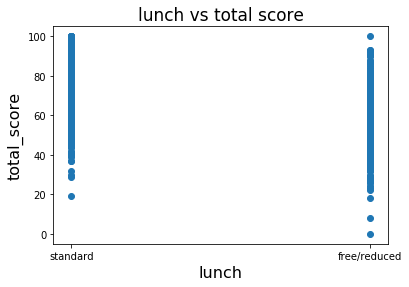

In [26]:
#scatter plot
plt . scatter ( df ['lunch'] , df ['math_score'] )
plt . title ( 'lunch vs total score' , fontsize = 17 )
plt . xlabel ( 'lunch' , fontsize = 16 )
plt . ylabel ( 'total_score' , fontsize = 16 )
plt . show ()

## apply method with dataframe


In [27]:
df . test_preparation_course = df . test_preparation_course . apply ( lambda x : 1 if x == "completed" else 2 )
df . head ()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,2,72,72,74,218
1,female,group C,some college,standard,1,69,90,88,247
2,female,group B,master's degree,standard,2,90,95,93,278
3,male,group A,associate's degree,free/reduced,2,47,57,44,148
4,male,group C,some college,standard,2,76,78,75,229


In [28]:
df . lunch = df . lunch .apply ( lambda x : 1 if x == "standard" else 2 )
df . head ()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,1,2,72,72,74,218
1,female,group C,some college,1,1,69,90,88,247
2,female,group B,master's degree,1,2,90,95,93,278
3,male,group A,associate's degree,2,2,47,57,44,148
4,male,group C,some college,1,2,76,78,75,229


In [29]:
df . gender = df . gender .apply (lambda x : 1 if x == "male" else 2 )
df . head()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,2,group B,bachelor's degree,1,2,72,72,74,218
1,2,group C,some college,1,1,69,90,88,247
2,2,group B,master's degree,1,2,90,95,93,278
3,1,group A,associate's degree,2,2,47,57,44,148
4,1,group C,some college,1,2,76,78,75,229


In [30]:
def change_value (i) :
    if i == "high school" :
        return 10
    elif i == "some college" :
        return 15
    elif i == "associate's degree" :
        return 20
    elif i == "bachelor's degree" :
        return 25
    elif i == "master's degree" :
        return 30
    elif i == "some high school" :
        return 12
final_value = []    
for i in df.parental_level_of_education :
    final_value . append ( change_value (i) )
df . parental_level_of_education = final_value   
df . head()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,2,group B,25,1,2,72,72,74,218
1,2,group C,15,1,1,69,90,88,247
2,2,group B,30,1,2,90,95,93,278
3,1,group A,20,2,2,47,57,44,148
4,1,group C,15,1,2,76,78,75,229


In [31]:
def change_value(i) :
    if i == "group A" :
        return 1
    elif i == "group B" :
        return 2
    elif i == "group C" :
        return 3
    elif i == "group D" :
        return 4
    elif i == "group E" :
        return 5
final_value = []    
for i in df . group :
    final_value . append ( change_value (i) )
df.group = final_value   
df . head ()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,2,2,25,1,2,72,72,74,218
1,2,3,15,1,1,69,90,88,247
2,2,2,30,1,2,90,95,93,278
3,1,1,20,2,2,47,57,44,148
4,1,3,15,1,2,76,78,75,229


In [32]:
df . describe ( include = 'all' ) . transpose ()

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,1.518,0.499926,1.0,1.00,2.0,2.0,2.0
group,1000.0,3.174,1.157179,1.0,2.00,3.0,4.0,5.0
parental_level_of_education,1000.0,16.658,5.866980,10.0,12.00,15.0,20.0,30.0
lunch,1000.0,1.355,0.478753,1.0,1.00,1.0,2.0,2.0
test_preparation_course,1000.0,1.642,0.479652,1.0,1.00,2.0,2.0,2.0
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
total_score,1000.0,203.312,42.771978,27.0,175.00,205.0,233.0,300.0


## Box Plot

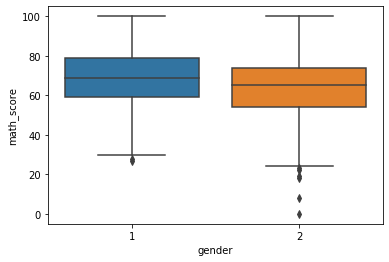

In [33]:
sn . boxplot ( x = 'gender' , y = 'math_score' , data = df )
plt . show ()

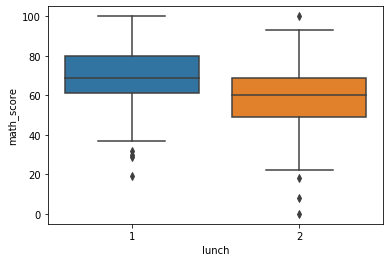

In [34]:
sn.boxplot(x='lunch', y='math_score', data=df)
plt.show()

## correlation between all the variables

In [35]:
df.corr()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
gender,1.000000,0.001502,0.050563,0.021372,0.006028,-0.167982,0.244313,0.301225,0.130861
group,0.001502,1.000000,0.087213,-0.046563,-0.017508,0.216415,0.145253,0.165691,0.185168
parental_level_of_education,0.050563,0.087213,1.000000,0.022598,-0.023276,0.161877,0.204933,0.250063,0.216181
lunch,0.021372,-0.046563,0.022598,1.000000,-0.017044,-0.350877,-0.229560,-0.245769,-0.290064
test_preparation_course,0.006028,-0.017508,-0.023276,-0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256710
math_score,-0.167982,0.216415,0.161877,-0.350877,-0.177702,1.000000,0.817580,0.802642,0.918746
reading_score,0.244313,0.145253,0.204933,-0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331
writing_score,0.301225,0.165691,0.250063,-0.245769,-0.312946,0.802642,0.954598,1.000000,0.965667
total_score,0.130861,0.185168,0.216181,-0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000


## Visulaize all correlations

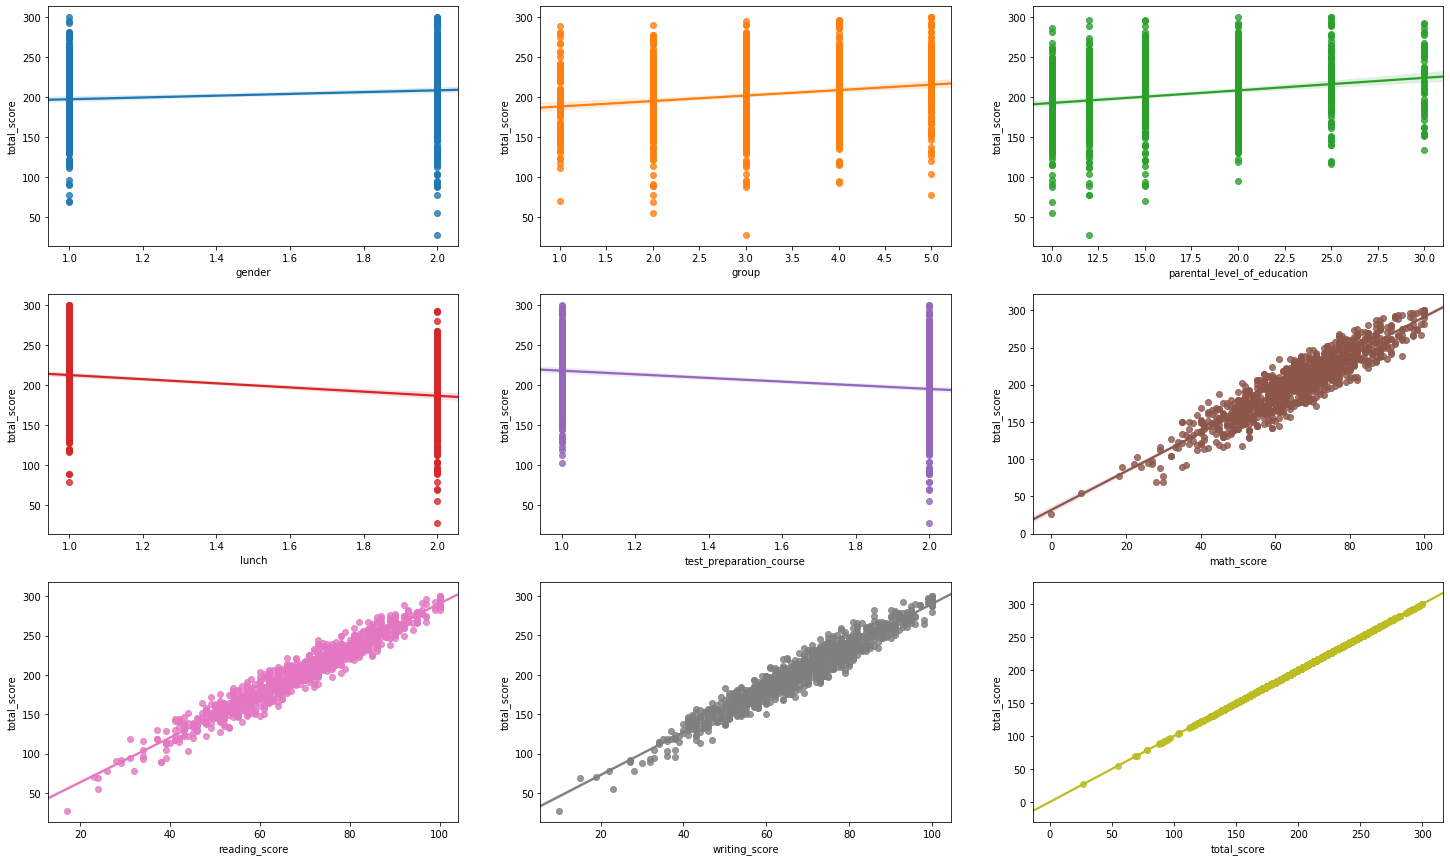

In [36]:
col_dtypes = df . dtypes  .tolist ()
numeric_cols = [ df . columns [idx] for idx, col_type in enumerate ( col_dtypes) if col_type == 'int64' or col_type == 'float64']
df_numerics = df [ numeric_cols ]
f , axes = plt . subplots ( 3 , 3 )
f . set_figheight (15)
f . set_figwidth (25)
col_idx = 0
for i in range (3) :
    for j in range (3) :
        x = numeric_cols [col_idx]
        sn . regplot ( x , y = "total_score" , data = df_numerics , ax = axes [i][j] )
        col_idx += 1

## loading dataset in new excel file

In [37]:
df . to_excel ( 'process_data.xlsx' , index = False )